In [11]:
# This code creates details of key variables on the Monsoon Planet
# based on monthly data

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1 import make_axes_locatable

savedir = "C:\\Users\\anjaka\\Nextcloud\\PhD\\03_MonsoonPlanet_Hysteresis\\Figures"


In [7]:

#%%###  LOAD DATA
#-------------------

slab_list = [50,200,500]  # available slabs
slab_list_sel = [50,200,500] # selected slabs

# monthly average of last 20 years
# adapt directory to the folder slab_20years_ymonmean
data_dir = 'C:/Users/anjaka/Nextcloud/PhD/03_MonsoonPlanet_Hysteresis/Codes_and_Data_for_Monsoon_Hysteresis_reveals_Atmospheric_Memory/data_reviewprocess/slab_20years_ymonmean/'

# Initialize dictionaries to store the data for each slab
ds_dict = {}

pr = {}
sw = {}
tsurf = {}
evap = {}
wvp = {}
rh = {}

for slab in slab_list:
    # Load the dataset
    ds_dict[slab] = xr.open_dataset(f'{data_dir}MonsoonPlanet_slab_{slab}.nc')
    
    # Extract the variables
    sw[slab] = ds_dict[slab]['swdn_toa']
    tsurf[slab] = ds_dict[slab]['t_surf']-273.15
    pr[slab] = ds_dict[slab]['precip']*86400
    evap[slab] = ds_dict[slab]['evap']*86400
    wvp[slab] = ds_dict[slab]['WVP']
    rh[slab] = ds_dict[slab]['rh']






In [8]:

#%%###  PROCESSING DATA
#---------------------------

# Monsoon region (m)
l_m= 10
u_m = 20

# Global (g)
l_g = -90
u_g = 90

# Equatorial ocean (eo)
l_eo = -10
u_eo = 10

# Northern equatorial ocean (neo)
l_neo = 0
u_neo = 10

# Southern equatorial ocean (seo)
l_seo = -10
u_seo = 0

# Define the latitude slices
slice_m = slice(l_m, u_m)
slice_eo = slice(l_eo, u_eo)
slice_neo = slice(l_neo, u_neo)
slice_seo = slice(l_seo, u_seo)
slice_g = slice(l_g, u_g)

# M
sw_m = {}
tsurf_m = {}
pr_m = {}
evap_m = {}
wvp_m = {}
rh_m = {}

sw_m_z = {}
tsurf_m_z = {}
pr_m_z = {}
evap_m_z = {}
wvp_m_z = {}
rh_m_z = {}

sw_m_z_mean = {}
tsurf_m_z_mean = {}
pr_m_z_mean = {}
evap_m_z_mean = {}
wvp_m_z_mean = {}
rh_m_z_mean = {}

rh_m_z_mean_hslice = {}
rh_m_z_mean_h = {}


for slab in slab_list:
    sw_m[slab] = sw[slab].sel(lat=slice_m)
    tsurf_m[slab] = tsurf[slab].sel(lat=slice_m)
    pr_m[slab] = pr[slab].sel(lat=slice_m)
    evap_m[slab] = evap[slab].sel(lat=slice_m)
    wvp_m[slab] = wvp[slab].sel(lat=slice_m)
    rh_m[slab] = rh[slab].sel(lat=slice_m)

    sw_m_z[slab] = sw_m[slab].mean('lon')
    tsurf_m_z[slab] = tsurf_m[slab].mean('lon') 
    pr_m_z[slab] = pr_m[slab].mean('lon')
    evap_m_z[slab] = evap_m[slab].mean('lon')
    wvp_m_z[slab] = wvp_m[slab].mean('lon')
    rh_m_z[slab] = rh_m[slab].mean('lon')

    weights = np.cos(np.deg2rad(sw[slab].lat))
    sw_m_z_mean[slab] = sw_m_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(tsurf[slab].lat))
    tsurf_m_z_mean[slab] = tsurf_m_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(pr[slab].lat))
    pr_m_z_mean[slab] = pr_m_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(evap[slab].lat))
    evap_m_z_mean[slab] = evap_m_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(wvp[slab].lat))
    wvp_m_z_mean[slab] = wvp_m_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(rh[slab].lat))
    rh_m_z_mean[slab] = rh_m_z[slab].weighted(weights).mean(dim=['lat'])

   
# Define the height slice
slice_h = slice(300, 1000)

for slab in slab_list:
    # Select data within the specified height range
    rh_m_z_mean_hslice[slab] = rh_m_z_mean[slab].sel(pfull=slice_h)

    # Define weights. If the weights are not equal, replace this line with the correct weights.
    weights = xr.DataArray(np.ones_like(rh_m_z_mean_hslice[slab].pfull), coords=[rh_m_z_mean_hslice[slab].pfull])

    # Calculate the weighted mean over the height dimension
    rh_m_z_mean_h[slab] = rh_m_z_mean_hslice[slab].weighted(weights).mean(dim='pfull')


# G
sw_g = {}
tsurf_g = {}
pr_g = {}
evap_g = {}
wvp_g = {}

sw_g_z = {}
tsurf_g_z = {}
pr_g_z = {}
evap_g_z = {}
wvp_g_z = {}

sw_g_z_mean = {}
tsurf_g_z_mean = {}
pr_g_z_mean = {}
evap_g_z_mean = {}
wvp_g_z_mean = {}


# Process the data for each slab
for slab in slab_list:
    sw_g[slab] = sw[slab].sel(lat=slice_g)
    tsurf_g[slab] = tsurf[slab].sel(lat=slice_g)
    pr_g[slab] = pr[slab].sel(lat=slice_g)
    evap_g[slab] = evap[slab].sel(lat=slice_g)
    wvp_g[slab] = wvp[slab].sel(lat=slice_g)

    sw_g_z[slab] = sw_g[slab].mean('lon')
    tsurf_g_z[slab] = tsurf_g[slab].mean('lon') 
    pr_g_z[slab] = pr_g[slab].mean('lon')
    evap_g_z[slab] = evap_g[slab].mean('lon')
    wvp_g_z[slab] = wvp_g[slab].mean('lon')

    weights = np.cos(np.deg2rad(sw[slab].lat))
    sw_g_z_mean[slab] = sw_g_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(tsurf[slab].lat))
    tsurf_g_z_mean[slab] = tsurf_g_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(pr[slab].lat))
    pr_g_z_mean[slab] = pr_g_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(evap[slab].lat))
    evap_g_z_mean[slab] = evap_g_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(wvp[slab].lat))
    wvp_g_z_mean[slab] = wvp_g_z[slab].weighted(weights).mean(dim=['lat'])





# eo
sw_eo = {}
tsurf_eo = {}
pr_eo = {}
evap_eo = {}
wvp_eo = {}

sw_eo_z = {}
tsurf_eo_z = {}
pr_eo_z = {}
evap_eo_z = {}
wvp_eo_z = {}

sw_eo_z_mean = {}
tsurf_eo_z_mean = {}
pr_eo_z_mean = {}
evap_eo_z_mean = {}
wvp_eo_z_mean = {}


# Process the data for each slab
for slab in slab_list:
    sw_eo[slab] = sw[slab].sel(lat=slice_eo)
    tsurf_eo[slab] = tsurf[slab].sel(lat=slice_eo)
    pr_eo[slab] = pr[slab].sel(lat=slice_eo)
    evap_eo[slab] = evap[slab].sel(lat=slice_eo)
    wvp_eo[slab] = wvp[slab].sel(lat=slice_eo)

    sw_eo_z[slab] = sw_eo[slab].mean('lon')
    tsurf_eo_z[slab] = tsurf_eo[slab].mean('lon') 
    pr_eo_z[slab] = pr_eo[slab].mean('lon')
    evap_eo_z[slab] = evap_eo[slab].mean('lon')
    wvp_eo_z[slab] = wvp_eo[slab].mean('lon')

    weights = np.cos(np.deg2rad(sw[slab].lat))
    sw_eo_z_mean[slab] = sw_eo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(tsurf[slab].lat))
    tsurf_eo_z_mean[slab] = tsurf_eo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(pr[slab].lat))
    pr_eo_z_mean[slab] = pr_eo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(evap[slab].lat))
    evap_eo_z_mean[slab] = evap_eo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(wvp[slab].lat))
    wvp_eo_z_mean[slab] = wvp_eo_z[slab].weighted(weights).mean(dim=['lat'])



# neo
sw_neo = {}
tsurf_neo = {}
pr_neo = {}
evap_neo = {}
wvp_neo = {}

sw_neo_z = {}
tsurf_neo_z = {}
pr_neo_z = {}
evap_neo_z = {}
wvp_neo_z = {}

sw_neo_z_mean = {}
tsurf_neo_z_mean = {}
pr_neo_z_mean = {}
evap_neo_z_mean = {}
wvp_neo_z_mean = {}


# Process the data for each slab
for slab in slab_list:
    sw_neo[slab] = sw[slab].sel(lat=slice_neo)
    tsurf_neo[slab] = tsurf[slab].sel(lat=slice_neo)
    pr_neo[slab] = pr[slab].sel(lat=slice_neo)
    evap_neo[slab] = evap[slab].sel(lat=slice_neo)
    wvp_neo[slab] = wvp[slab].sel(lat=slice_neo)

    sw_neo_z[slab] = sw_neo[slab].mean('lon')
    tsurf_neo_z[slab] = tsurf_neo[slab].mean('lon') 
    pr_neo_z[slab] = pr_neo[slab].mean('lon')
    evap_neo_z[slab] = evap_neo[slab].mean('lon')
    wvp_neo_z[slab] = wvp_neo[slab].mean('lon')

    weights = np.cos(np.deg2rad(sw[slab].lat))
    sw_neo_z_mean[slab] = sw_neo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(tsurf[slab].lat))
    tsurf_neo_z_mean[slab] = tsurf_neo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(pr[slab].lat))
    pr_neo_z_mean[slab] = pr_neo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(evap[slab].lat))
    evap_neo_z_mean[slab] = evap_neo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(wvp[slab].lat))
    wvp_neo_z_mean[slab] = wvp_neo_z[slab].weighted(weights).mean(dim=['lat'])


# seo
sw_seo = {}
tsurf_seo = {}
pr_seo = {}
evap_seo = {}
wvp_seo = {}

sw_seo_z = {}
tsurf_seo_z = {}
pr_seo_z = {}
evap_seo_z = {}
wvp_seo_z = {}

sw_seo_z_mean = {}
tsurf_seo_z_mean = {}
pr_seo_z_mean = {}
evap_seo_z_mean = {}
wvp_seo_z_mean = {}


# Process the data for each slab
for slab in slab_list:
    sw_seo[slab] = sw[slab].sel(lat=slice_seo)
    tsurf_seo[slab] = tsurf[slab].sel(lat=slice_seo)
    pr_seo[slab] = pr[slab].sel(lat=slice_seo)
    evap_seo[slab] = evap[slab].sel(lat=slice_seo)
    wvp_seo[slab] = wvp[slab].sel(lat=slice_seo)

    sw_seo_z[slab] = sw_seo[slab].mean('lon')
    tsurf_seo_z[slab] = tsurf_seo[slab].mean('lon') 
    pr_seo_z[slab] = pr_seo[slab].mean('lon')
    evap_seo_z[slab] = evap_seo[slab].mean('lon')
    wvp_seo_z[slab] = wvp_seo[slab].mean('lon')

    weights = np.cos(np.deg2rad(sw[slab].lat))
    sw_seo_z_mean[slab] = sw_seo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(tsurf[slab].lat))
    tsurf_seo_z_mean[slab] = tsurf_seo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(pr[slab].lat))
    pr_seo_z_mean[slab] = pr_seo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(evap[slab].lat))
    evap_seo_z_mean[slab] = evap_seo_z[slab].weighted(weights).mean(dim=['lat'])
    weights = np.cos(np.deg2rad(wvp[slab].lat))
    wvp_seo_z_mean[slab] = wvp_seo_z[slab].weighted(weights).mean(dim=['lat'])




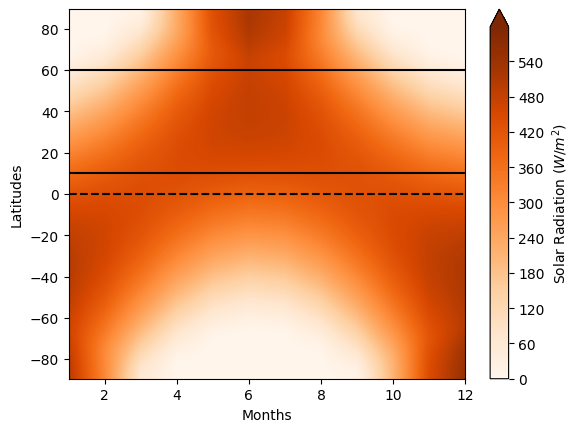

In [9]:


### SW contourf
plt.figure()
plt.contourf(sw_g_z[50]['time.month'],sw_g_z[50]['lat'],sw_g_z[50].transpose(),cmap="Oranges",extend="max",levels = range(0,600))
plt.ylabel("Latitudes")
plt.xlabel("Months")
plt.axhline(0, color = "black", linestyle = '--')
plt.axhline(10, color = "black")
plt.axhline(60, color = "black")
plt.colorbar(label = "Solar Radiation $(W/m^2)$")
plt.show()
#plt.savefig(savedir + '/general_characteristics/sw_contourf_slab50.pdf',bbox_inches = 'tight')



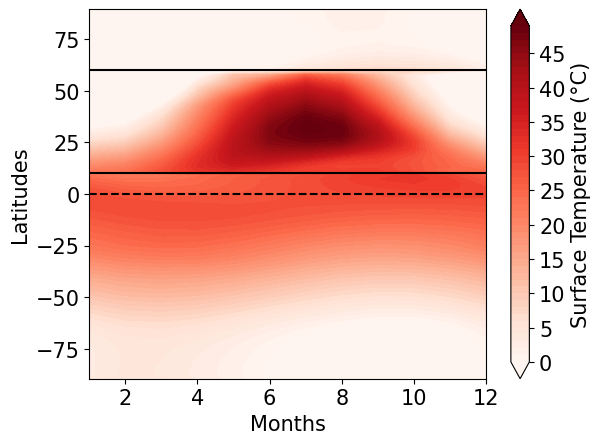

<Figure size 640x480 with 0 Axes>

In [44]:

#%%###  PLOT
#-------------------
### GENERAL CHARACTERISTICS FOR SLAB 5M

### TSURF contourf
plt.figure()
plt.contourf(tsurf_g_z[50]['time.month'],tsurf_g_z[50]['lat'],tsurf_g_z[50].transpose(),cmap="Reds",extend="both",levels = range(0,50))
plt.ylabel("Latitudes")
plt.xlabel("Months")
plt.axhline(0, color = "black", linestyle = '--')
plt.axhline(10, color = "black")
plt.axhline(60, color = "black")
plt.colorbar(label = "Surface Temperature (°C)")
plt.show()
plt.savefig(savedir + '/general_characteristics/tsurf_contourf_slab50.pdf',bbox_inches = 'tight')


#



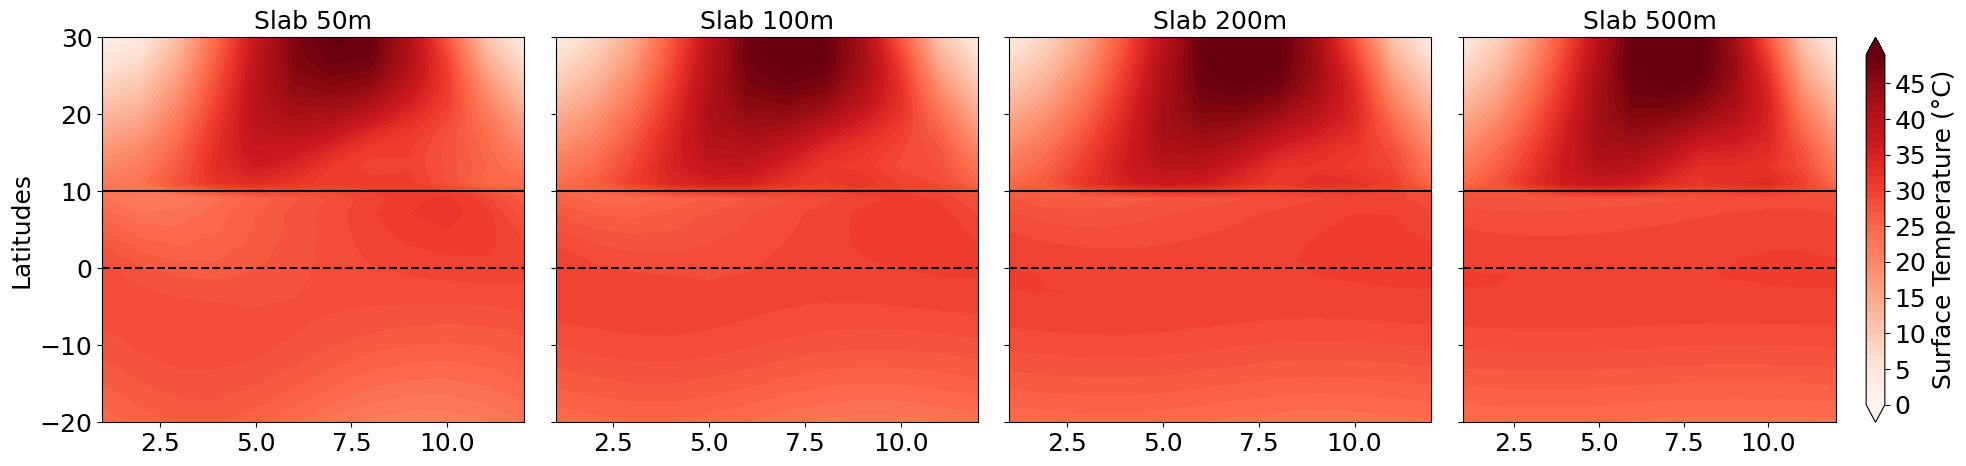

In [45]:
low = -20
up = 30

plt.rcParams.update({'font.size': 18})

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

# Plot for slab50
for i in range(0,4):
    contourf1 = axs[i].contourf(tsurf_g_z[slab_list_sel[i]]['time.month'],tsurf_g_z[slab_list_sel[i]]['lat'],tsurf_g_z[slab_list_sel[i]].transpose(), cmap="Reds", extend="both", levels=range(0, 50))
   # axs[i].set_xlabel("Months")
    if i == 0:
        axs[i].set_ylabel("Latitudes", fontsize=18)
    axs[i].axhline(0, color="black", linestyle='--')
    axs[i].axhline(10, color="black")
    axs[i].axhline(60, color="black")
    axs[i].set_title("Slab " + str(slab_list_sel[i]) + "m", fontsize=18)
    axs[i].set_ylim(low, up)


# Create an axes on the right side of axs. The width of cax will be 5%
# of axs and the padding between cax and axs will be fixed at 0.05 inch.
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.3)

#Create the colorbar
cbar = fig.colorbar(contourf1, cax=cax, orientation='vertical')

# Set the label for the colorbar and specify the font size
cbar.set_label("Surface Temperature (°C)", size=18)

plt.tight_layout()  
plt.savefig(savedir + '/general_characteristics/tsurf_contourf_slabmix.pdf',bbox_inches = 'tight')



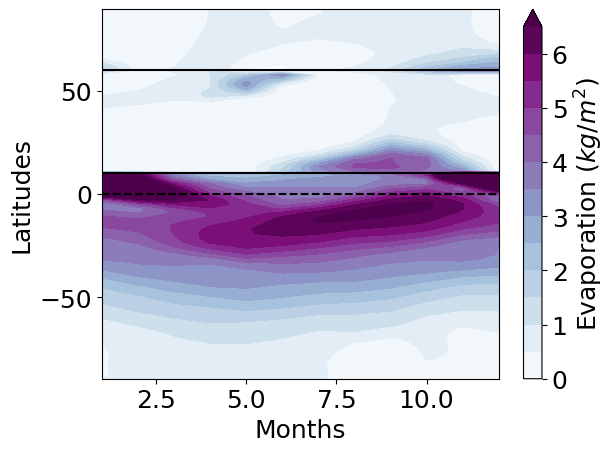

In [46]:

### EVAP contourf
plt.figure()
plt.contourf(evap_g_z[50]['time.month'],evap_g_z[50]['lat'],evap_g_z[50].transpose(),cmap="BuPu",extend="max",levels = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5])
plt.ylabel("Latitudes")
plt.xlabel("Months")
plt.axhline(0, color = "black", linestyle = '--')
plt.axhline(10, color = "black")
plt.axhline(60, color = "black")
plt.colorbar(label = "Evaporation $(kg/m^2)$")
plt.savefig(savedir + '/general_characteristics/evap_contourf_slab50.pdf',bbox_inches = 'tight')



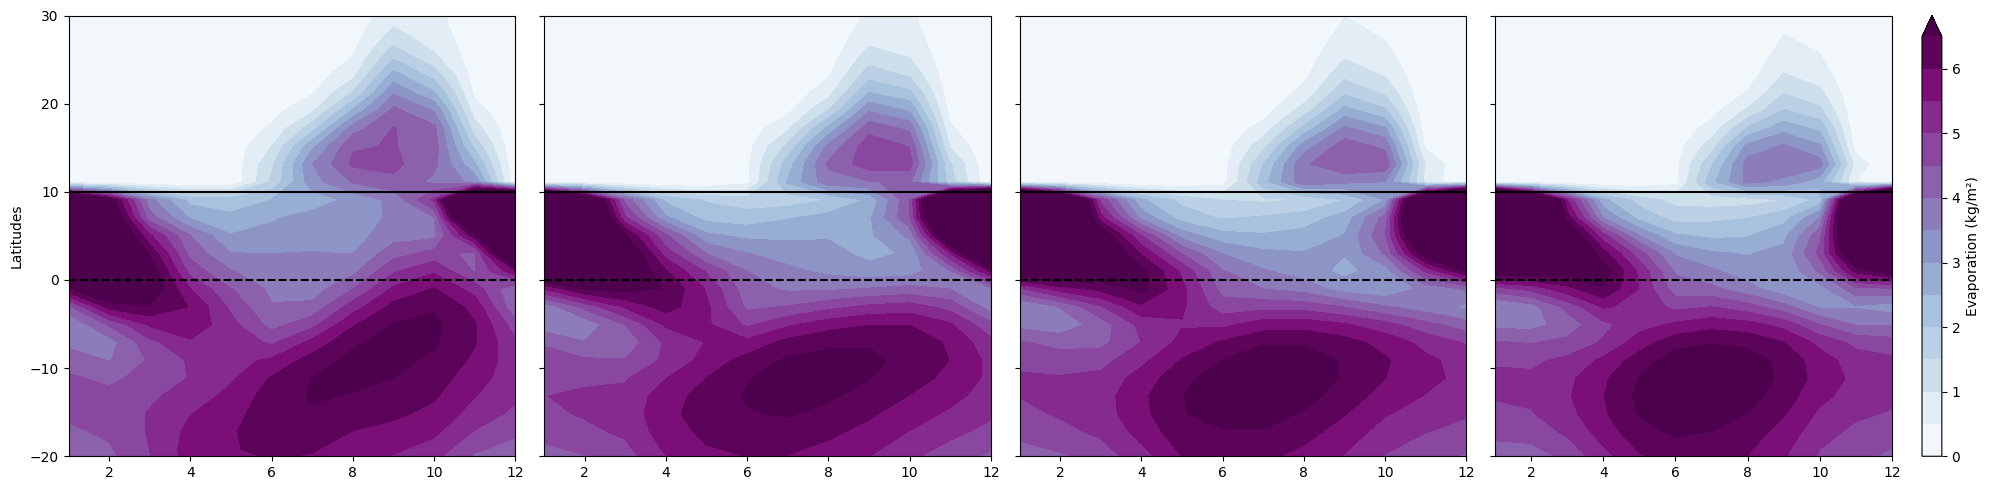

In [5]:
low = -20
up = 30

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

# Plot for slab50
for i in range(0,4):
    contourf1 = axs[i].contourf(evap_g_z[slab_list_sel[i]]['time.month'], evap_g_z[slab_list_sel[i]]['lat'], evap_g_z[slab_list_sel[i]].transpose(),cmap="BuPu",extend="max",levels = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5])
   # axs[i].set_xlabel("Months")
    if i == 0:
        axs[i].set_ylabel("Latitudes")
    axs[i].axhline(0, color="black", linestyle='--')
    axs[i].axhline(10, color="black")
    axs[i].axhline(60, color="black")
    #axs[i].set_title("Slab " + str(slab_list_sel[i]) + "m")
    axs[i].set_ylim(low, up)


# Create an axes on the right side of axs. The width of cax will be 5%
# of axs and the padding between cax and axs will be fixed at 0.05 inch.
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.3)

fig.colorbar(contourf1, cax=cax, orientation='vertical', label="Evaporation (kg/m²)")

plt.tight_layout()  
plt.savefig(savedir + '/general_characteristics/evap_contourf_slabmix.pdf',bbox_inches = 'tight')


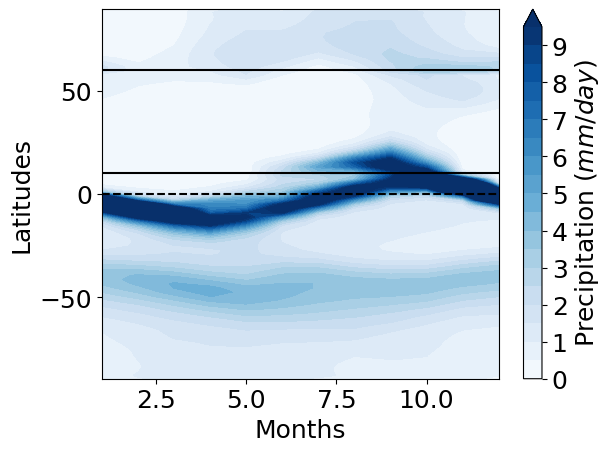

In [48]:

### PRECIP contourf
plt.figure()
plt.contourf(pr_g_z[50]['time.month'],pr_g_z[50]['lat'],pr_g_z[50].transpose(),cmap="Blues",extend="max",levels = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5])
plt.ylabel("Latitudes")
plt.xlabel("Months")
plt.axhline(0, color = "black", linestyle = '--')
plt.axhline(10, color = "black")
plt.axhline(60, color = "black")
plt.colorbar(label = "Precipitation $(mm/day)$")
plt.savefig(savedir + '/general_characteristics/pr_contourf_slab50.pdf',bbox_inches = 'tight')


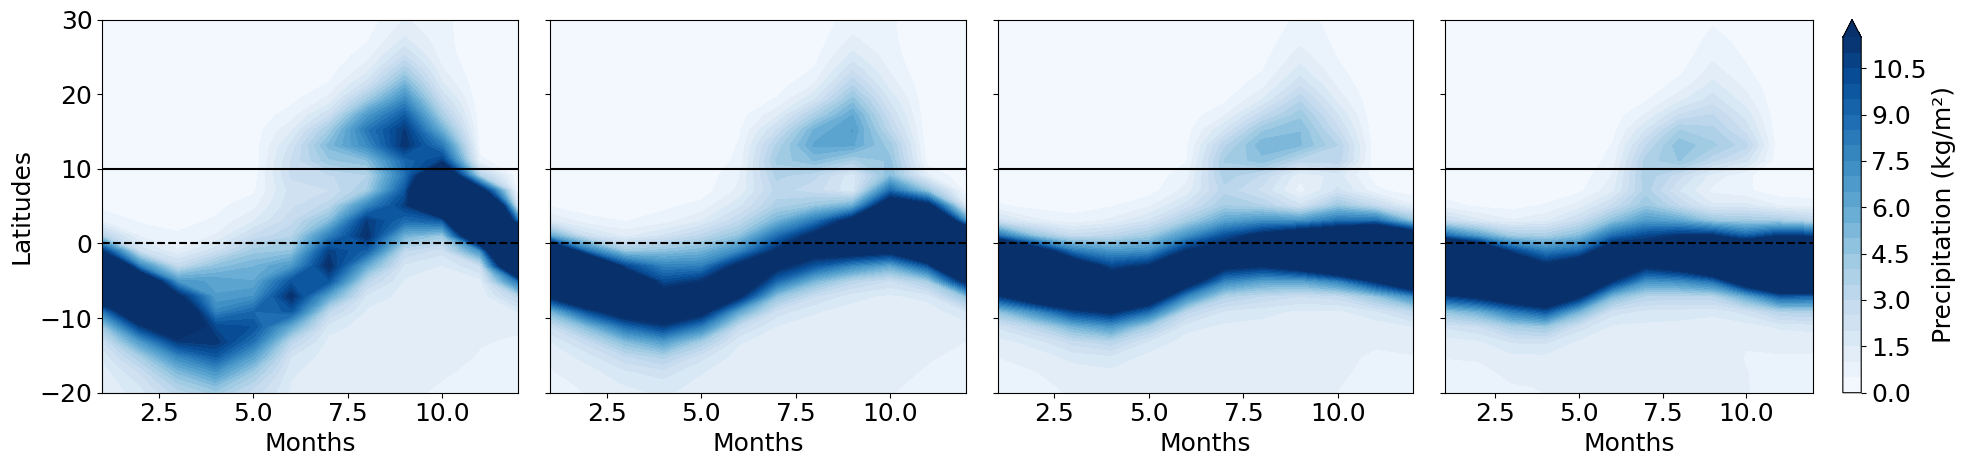

In [49]:
low = -20
up = 30

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

# Plot for slab50
for i in range(0,4):
    contourf1 = axs[i].contourf(pr_g_z[slab_list_sel[i]]['time.month'], pr_g_z[slab_list_sel[i]]['lat'], pr_g_z[slab_list_sel[i]].transpose(),cmap="Blues",extend="max",levels = np.arange(0,12,0.5))
    axs[i].set_xlabel("Months")
    if i == 0:
        axs[i].set_ylabel("Latitudes")
    axs[i].axhline(0, color="black", linestyle='--')
    axs[i].axhline(10, color="black")
    axs[i].axhline(60, color="black")
    #axs[i].set_title("Slab " + str(slab_list_sel[i]) + "m")
    axs[i].set_ylim(low, up)


# Create an axes on the right side of axs. The width of cax will be 5%
# of axs and the padding between cax and axs will be fixed at 0.05 inch.
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.3)

fig.colorbar(contourf1, cax=cax, orientation='vertical', label="Precipitation (kg/m²)")

plt.tight_layout()  
#plt.show()
plt.savefig(savedir + '/general_characteristics/pr_contourf_slabmix.pdf',bbox_inches = 'tight')


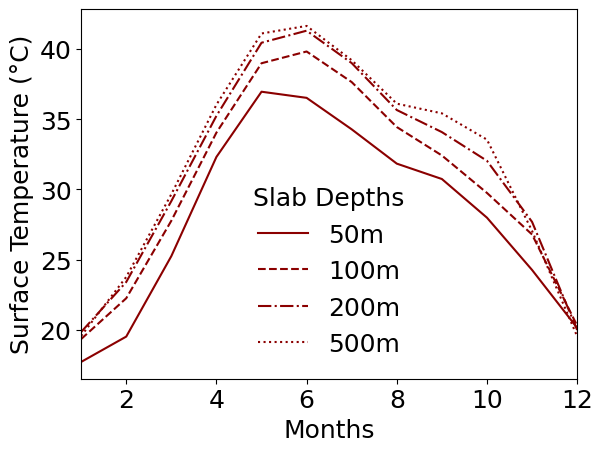

In [50]:
# Tsurf per month
plt.figure()
plt.plot(tsurf_m_z_mean[slab_list_sel[0]]['time.month'], tsurf_m_z_mean[slab_list_sel[0]], label=str(slab_list_sel[0]) + "m", linestyle="-", color="darkred")
plt.plot(tsurf_m_z_mean[slab_list_sel[1]]['time.month'], tsurf_m_z_mean[slab_list_sel[1]], label=str(slab_list_sel[1]) + "m", linestyle="--", color="darkred")
plt.plot(tsurf_m_z_mean[slab_list_sel[2]]['time.month'], tsurf_m_z_mean[slab_list_sel[2]], label=str(slab_list_sel[2]) + "m", linestyle="-.", color="darkred")
plt.plot(tsurf_m_z_mean[slab_list_sel[3]]['time.month'], tsurf_m_z_mean[slab_list_sel[3]], label=str(slab_list_sel[3]) + "m", linestyle=":", color="darkred")
plt.xlim([1, 12])
plt.xlabel("Months")
plt.ylabel("Surface Temperature (°C)")
plt.legend(title="Slab Depths", frameon=False)
plt.savefig(savedir + '/Different_slab_depths/tsurf_per_month_slabmix.pdf', bbox_inches='tight')

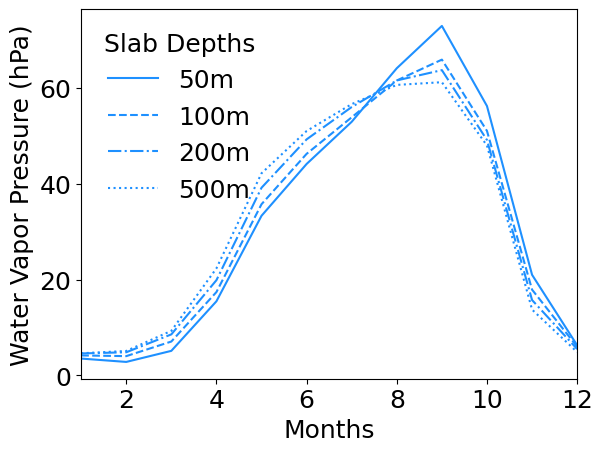

In [51]:
# WVP per month
plt.figure()
plt.plot(wvp_m_z_mean[slab_list_sel[0]]['time.month'], wvp_m_z_mean[slab_list_sel[0]], label=str(slab_list_sel[0]) + "m", linestyle="-", color="dodgerblue")
plt.plot(wvp_m_z_mean[slab_list_sel[1]]['time.month'], wvp_m_z_mean[slab_list_sel[1]], label=str(slab_list_sel[1]) + "m", linestyle="--", color="dodgerblue")
plt.plot(wvp_m_z_mean[slab_list_sel[2]]['time.month'], wvp_m_z_mean[slab_list_sel[2]], label=str(slab_list_sel[2]) + "m", linestyle="-.", color="dodgerblue")
plt.plot(wvp_m_z_mean[slab_list_sel[3]]['time.month'], wvp_m_z_mean[slab_list_sel[3]], label=str(slab_list_sel[3]) + "m", linestyle=":", color="dodgerblue")
plt.xlim([1, 12])
plt.xlabel("Months")
plt.ylabel("Water Vapor Pressure (hPa)")
plt.legend(title="Slab Depths", frameon=False)
plt.savefig(savedir + '/Different_slab_depths/wvp_per_month_slabmix.pdf', bbox_inches='tight')



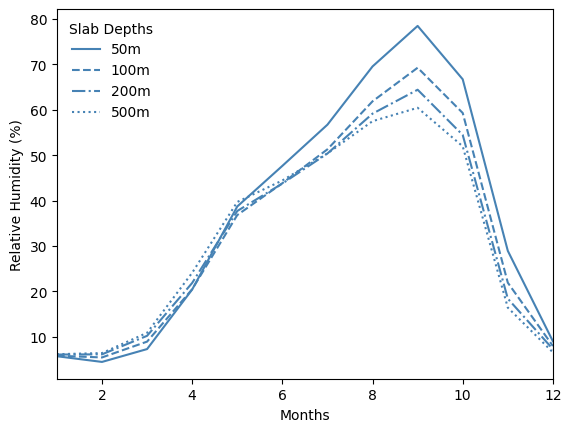

In [11]:
# RH per month
plt.figure()
plt.plot(rh_m_z_mean_h[slab_list_sel[0]]['time.month'], rh_m_z_mean_h[slab_list_sel[0]], label=str(slab_list_sel[0]) + "m", linestyle="-", color="steelblue")
plt.plot(rh_m_z_mean_h[slab_list_sel[1]]['time.month'], rh_m_z_mean_h[slab_list_sel[1]], label=str(slab_list_sel[1]) + "m", linestyle="--", color="steelblue")
plt.plot(rh_m_z_mean_h[slab_list_sel[2]]['time.month'], rh_m_z_mean_h[slab_list_sel[2]], label=str(slab_list_sel[2]) + "m", linestyle="-.", color="steelblue")
plt.plot(rh_m_z_mean_h[slab_list_sel[3]]['time.month'], rh_m_z_mean_h[slab_list_sel[3]], label=str(slab_list_sel[3]) + "m", linestyle=":", color="steelblue")
plt.xlim([1, 12])
plt.xlabel("Months")
plt.ylabel("Relative Humidity (%)")
plt.legend(title="Slab Depths", frameon=False)
plt.savefig(savedir + '/Different_slab_depths/rh_per_month_slabmix.pdf', bbox_inches='tight')

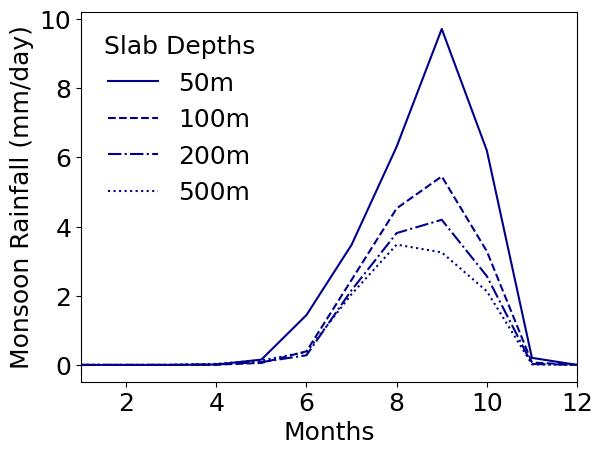

In [52]:

#%%
### Precip per month
plt.figure()
plt.plot(pr_m_z_mean[slab_list_sel[0]]['time.month'],pr_m_z_mean[slab_list_sel[0]], label = str(slab_list_sel[0]) +"m",linestyle = "-", color = "darkblue")
plt.plot(pr_m_z_mean[slab_list_sel[1]]['time.month'],pr_m_z_mean[slab_list_sel[1]], label = str(slab_list_sel[1]) +"m",linestyle = "--", color = "darkblue")
plt.plot(pr_m_z_mean[slab_list_sel[2]]['time.month'],pr_m_z_mean[slab_list_sel[2]], label = str(slab_list_sel[2]) +"m",linestyle = "-.", color = "darkblue")
plt.plot(pr_m_z_mean[slab_list_sel[3]]['time.month'],pr_m_z_mean[slab_list_sel[3]], label = str(slab_list_sel[3]) +"m",linestyle = ":", color = "darkblue")
plt.xlim([1,12])
plt.xlabel("Months")
plt.ylabel("Monsoon Rainfall (mm/day)")
plt.legend(title = "Slab Depths", frameon = False)
plt.savefig(savedir + '/Different_slab_depths/precip_per_month_slabmix.pdf',bbox_inches = 'tight')


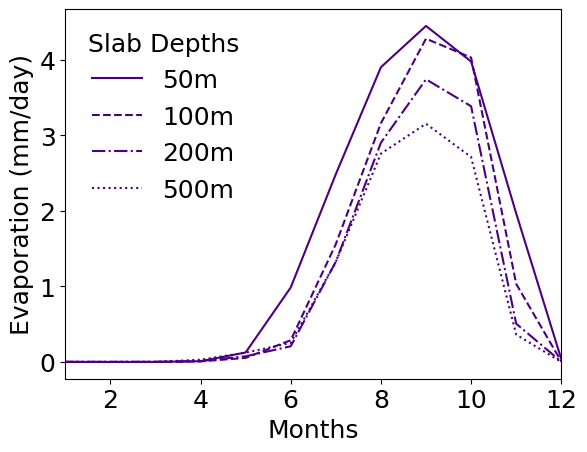

In [53]:
#%%
### Evap per month 
plt.figure()
plt.plot(evap_m_z_mean[slab_list_sel[0]]['time.month'],evap_m_z_mean[slab_list_sel[0]], label = str(slab_list_sel[0]) +"m",linestyle = "-", color = "indigo")
plt.plot(evap_m_z_mean[slab_list_sel[1]]['time.month'],evap_m_z_mean[slab_list_sel[1]], label = str(slab_list_sel[1]) +"m",linestyle = "--", color = "indigo")
plt.plot(evap_m_z_mean[slab_list_sel[2]]['time.month'],evap_m_z_mean[slab_list_sel[2]], label = str(slab_list_sel[2]) +"m",linestyle = "-.", color = "indigo")
plt.plot(evap_m_z_mean[slab_list_sel[3]]['time.month'],evap_m_z_mean[slab_list_sel[3]], label = str(slab_list_sel[3]) +"m",linestyle = ":", color = "indigo")
plt.xlim([1,12])
plt.xlabel("Months")
plt.ylabel("Evaporation (mm/day)")
plt.legend(title = "Slab Depths", frameon = False)
plt.savefig(savedir + '/Different_slab_depths/evap_per_month_slabmix.pdf',bbox_inches = 'tight')


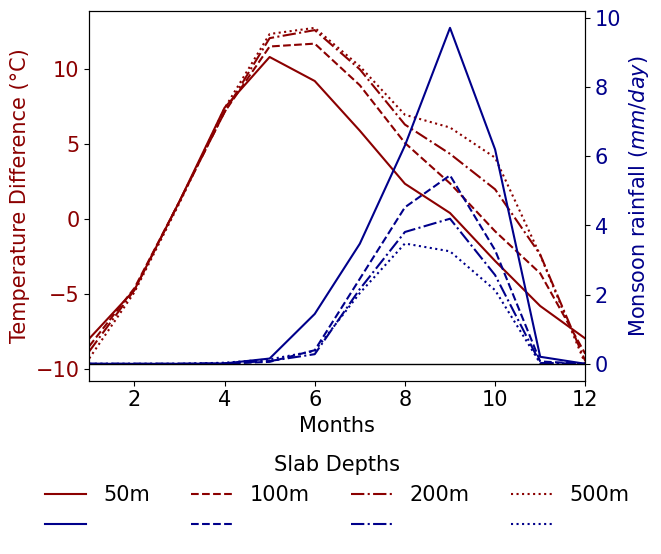

In [54]:

#%%
###  TSURF DIFF + PRECIP
plt.rcParams.update({'font.size': 15})

fig,ax1 = plt.subplots()

#ax2.plot(tsurf_slab1_m_z_mean['time.month'],tsurf_slab1_m_z_mean-273, color = "darkred", label = "5m", linestyle = '-')
ax1.plot(tsurf_m_z_mean[slab_list_sel[0]]['time.month'],tsurf_m_z_mean[slab_list_sel[0]]-tsurf_neo_z_mean[slab_list_sel[0]], color = "darkred", label = str(slab_list_sel[0]) +  "m", linestyle = '-')
ax1.plot(tsurf_m_z_mean[slab_list_sel[1]]['time.month'],tsurf_m_z_mean[slab_list_sel[1]]-tsurf_neo_z_mean[slab_list_sel[1]], color = "darkred", label = str(slab_list_sel[1]) + "m", linestyle = '--')
ax1.plot(tsurf_m_z_mean[slab_list_sel[2]]['time.month'],tsurf_m_z_mean[slab_list_sel[2]]-tsurf_neo_z_mean[slab_list_sel[2]], color = "darkred", label = str(slab_list_sel[2]) + "m", linestyle = '-.')
ax1.plot(tsurf_m_z_mean[slab_list_sel[3]]['time.month'],tsurf_m_z_mean[slab_list_sel[3]]-tsurf_neo_z_mean[slab_list_sel[3]], color = "darkred", label = str(slab_list_sel[3]) + "m", linestyle = ':')
plt.ylabel("Temperature Difference (°C)", color = "darkred")
plt.xlabel("Months")

ax2 = ax1.twinx()
ax2.plot(pr_m_z_mean[slab_list_sel[0]]['time.month'],pr_m_z_mean[slab_list_sel[0]], label = str(slab_list_sel[0]) + "m",linestyle = "-", color = "darkblue")
ax2.plot(pr_m_z_mean[slab_list_sel[1]]['time.month'],pr_m_z_mean[slab_list_sel[1]], label = str(slab_list_sel[1]) +  "m",linestyle = "--", color = "darkblue")
ax2.plot(pr_m_z_mean[slab_list_sel[2]]['time.month'],pr_m_z_mean[slab_list_sel[2]], label = str(slab_list_sel[2]) +  "m",linestyle = "-.", color = "darkblue")
ax2.plot(pr_m_z_mean[slab_list_sel[3]]['time.month'],pr_m_z_mean[slab_list_sel[3]], label = str(slab_list_sel[3]) +  "m",linestyle = ":", color = "darkblue")
plt.xlabel("Months")
plt.ylabel("Monsoon rainfall $(mm/day)$", color = "darkblue")


plt.xlabel("Months")
plt.xlim([1,12])

# Create custom legend handles
# Create custom legend handles
line1a = mlines.Line2D([], [], color='darkred', linestyle='-', label=str(slab_list_sel[0]) + 'm')
line1b = mlines.Line2D([], [], color='darkblue', linestyle='-')
line2a = mlines.Line2D([], [], color='darkred', linestyle='--', label=str(slab_list_sel[1]) + 'm')
line2b = mlines.Line2D([], [], color='darkblue', linestyle='--')
line3a = mlines.Line2D([], [], color='darkred', linestyle='-.', label=str(slab_list_sel[2]) + 'm')
line3b = mlines.Line2D([], [], color='darkblue', linestyle='-.')
line4a = mlines.Line2D([], [], color='darkred', linestyle=':', label=str(slab_list_sel[3]) + 'm')
line4b = mlines.Line2D([], [], color='darkblue', linestyle=':')

# Add the custom handles to the legend
plt.legend(handles=[line1a, line1b, line2a, line2b, line3a, line3b, line4a, line4b], loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, title="Slab Depths", ncol=4)
plt.axhline(0, color = "black", linewidth = 1)
plt.xlabel("Months")
ax2.tick_params(axis='y', labelcolor='darkblue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.savefig(savedir + '/general_characteristics/tsurf-diff_precip_' + str(l_m) + '_' + str(u_m) + '_minus_' + str(l_neo) + '_' + str(u_neo) + '.pdf',bbox_inches = 'tight')


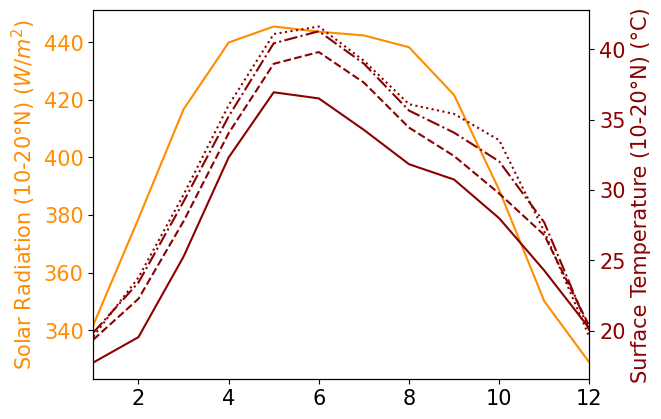

In [55]:

#%%
### SW + TSURF (LAND)
fig, ax1 = plt.subplots()
ax1.plot(sw_m_z_mean[slab_list_sel[0]]['time.month'], sw_m_z_mean[slab_list_sel[0]], color="darkorange", label=str(slab_list_sel[0]) + "m")
ax1.set_ylabel("Solar Radiation (10-20°N) $(W/m^2)$", color="darkorange")
#ax1.set_xlabel("Months")
ax1.tick_params(axis='y', labelcolor='darkorange')

ax2 = ax1.twinx()
ax2.plot(tsurf_m_z_mean[slab_list_sel[0]]['time.month'], tsurf_m_z_mean[slab_list_sel[0]], color="darkred", label=str(slab_list_sel[0]) + "m")
ax2.plot(tsurf_m_z_mean[slab_list_sel[1]]['time.month'], tsurf_m_z_mean[slab_list_sel[1]], color="darkred", label=str(slab_list_sel[1]) + "m", linestyle='--')
ax2.plot(tsurf_m_z_mean[slab_list_sel[2]]['time.month'], tsurf_m_z_mean[slab_list_sel[2]], color="darkred", label=str(slab_list_sel[2]) + "m", linestyle='-.')
ax2.plot(tsurf_m_z_mean[slab_list_sel[3]]['time.month'], tsurf_m_z_mean[slab_list_sel[3]], color="darkred", label=str(slab_list_sel[3]) + "m", linestyle=':')
ax2.set_ylabel("Surface Temperature (10-20°N) (°C)", color="darkred")
ax2.tick_params(axis='y', labelcolor='darkred')

plt.xlim([1, 12])
#plt.legend(title="Slab Depths", frameon=False, loc="lower center")
plt.savefig(savedir + '/general_characteristics/sw_tsurf-land_slice_' + str(l_m) + '_' + str(u_m) + '.pdf', bbox_inches='tight')

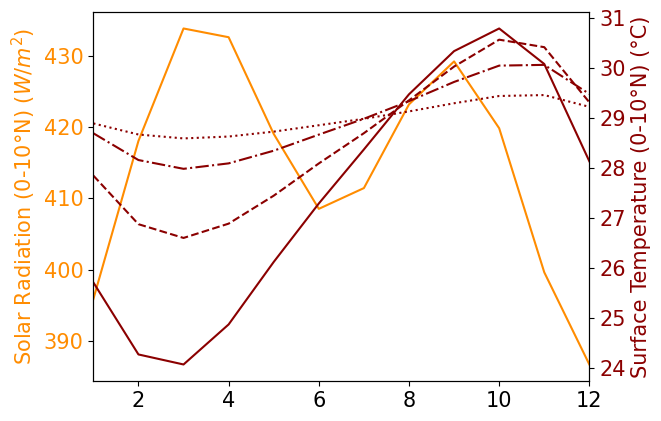

In [56]:


#%%
### SW + TSURF (N OCEAN)
fig, ax1 = plt.subplots()
ax1.plot(sw_neo_z_mean[slab_list_sel[0]]['time.month'], sw_neo_z_mean[slab_list_sel[0]], color="darkorange", label=str(slab_list_sel[0]) + "m")
ax1.set_ylabel("Solar Radiation (0-10°N) $(W/m^2)$", color="darkorange")
#ax1.set_xlabel("Months")
ax1.tick_params(axis='y', labelcolor='darkorange')

ax2 = ax1.twinx()
ax2.plot(tsurf_neo_z_mean[slab_list_sel[0]]['time.month'], tsurf_neo_z_mean[slab_list_sel[0]], color="darkred", label=str(slab_list_sel[0]) + "m")
ax2.plot(tsurf_neo_z_mean[slab_list_sel[1]]['time.month'], tsurf_neo_z_mean[slab_list_sel[1]], color="darkred", label=str(slab_list_sel[1]) + "m", linestyle='--')
ax2.plot(tsurf_neo_z_mean[slab_list_sel[2]]['time.month'], tsurf_neo_z_mean[slab_list_sel[2]], color="darkred", label=str(slab_list_sel[2]) + "m", linestyle='-.')
ax2.plot(tsurf_neo_z_mean[slab_list_sel[3]]['time.month'], tsurf_neo_z_mean[slab_list_sel[3]], color="darkred", label=str(slab_list_sel[3]) + "m", linestyle=':')
ax2.set_ylabel("Surface Temperature (0-10°N) (°C)", color="darkred")
ax2.tick_params(axis='y', labelcolor='darkred')

plt.xlim([1, 12])
#plt.legend(title="Slab Depths", frameon=False, loc="lower center")
plt.savefig(savedir + '/general_characteristics/sw_tsurf-ocean_slice_' + str(l_neo) + '_' + str(u_neo) + '.pdf', bbox_inches='tight')


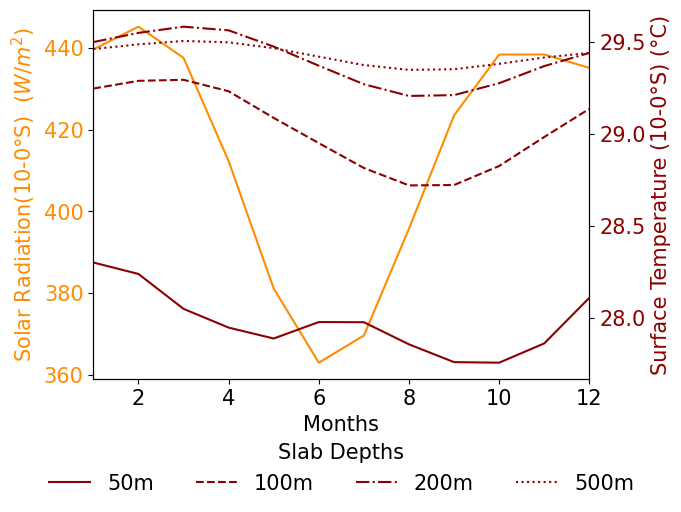

In [57]:

#%%
### SW + TSURF (S OCEAN)
fig, ax1 = plt.subplots()
ax1.plot(sw_seo_z_mean[slab_list_sel[0]]['time.month'], sw_seo_z_mean[slab_list_sel[0]], color="darkorange", label=str(slab_list_sel[0]) + "m")
ax1.set_ylabel("Solar Radiation(10-0°S)  $(W/m^2)$", color="darkorange")
ax1.tick_params(axis='y', labelcolor='darkorange')
ax1.set_xlabel("Months")

ax2 = ax1.twinx()
ax2.plot(tsurf_seo_z_mean[slab_list_sel[0]]['time.month'], tsurf_seo_z_mean[slab_list_sel[0]], color="darkred", label=str(slab_list_sel[0]) + "m")
ax2.plot(tsurf_seo_z_mean[slab_list_sel[1]]['time.month'], tsurf_seo_z_mean[slab_list_sel[1]], color="darkred", label=str(slab_list_sel[1]) + "m", linestyle='--')
ax2.plot(tsurf_seo_z_mean[slab_list_sel[2]]['time.month'], tsurf_seo_z_mean[slab_list_sel[2]], color="darkred", label=str(slab_list_sel[2]) + "m", linestyle='-.')
ax2.plot(tsurf_seo_z_mean[slab_list_sel[3]]['time.month'], tsurf_seo_z_mean[slab_list_sel[3]], color="darkred", label=str(slab_list_sel[3]) + "m", linestyle=':')
ax2.set_ylabel("Surface Temperature (10-0°S) (°C)", color="darkred")
ax2.tick_params(axis='y', labelcolor='darkred')

plt.xlim([1, 12])
plt.legend(title="Slab Depths", bbox_to_anchor=(0.5, -0.15), loc="upper center", borderaxespad=0., ncol=4, frameon = False)
plt.savefig(savedir + '/general_characteristics/sw_tsurf-ocean_slice_' + str(l_seo) + '_' + str(u_seo) + '.pdf', bbox_inches='tight')

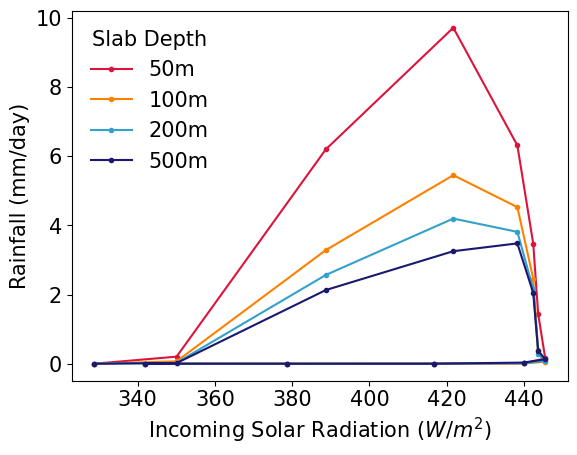

In [58]:
### Hysteresis for different slab depths

plt.figure()
plt.plot(sw_m_z_mean[slab_list_sel[0]], pr_m_z_mean[slab_list_sel[0]], marker = '.', label = str(slab_list_sel[0]) + "m", color = "#DC143C")
plt.plot(sw_m_z_mean[slab_list_sel[1]], pr_m_z_mean[slab_list_sel[1]], marker = '.', label = str(slab_list_sel[1]) + "m", color = "#FF8000")
plt.plot(sw_m_z_mean[slab_list_sel[2]], pr_m_z_mean[slab_list_sel[2]], marker = '.', label = str(slab_list_sel[2]) + "m", color = "#33A1C9")
plt.plot(sw_m_z_mean[slab_list_sel[3]], pr_m_z_mean[slab_list_sel[3]], marker = '.', label = str(slab_list_sel[3]) + "m", color = "#191970")
plt.xlabel('Incoming Solar Radiation ($W/m^2$)')
plt.ylabel('Rainfall (mm/day)')
plt.legend(frameon = False, title = "Slab Depth")
plt.savefig(savedir + '/general_characteristics/hysteresis_sw_pr_slabmix.pdf',bbox_inches = 'tight')


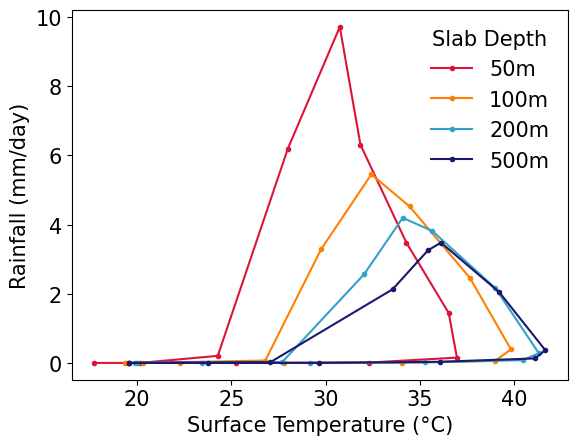

In [59]:


# Hysteresis tsurf
plt.figure()
plt.plot(tsurf_m_z_mean[slab_list_sel[0]], pr_m_z_mean[slab_list_sel[0]], marker = '.', label = str(slab_list_sel[0]) + "m", color = "#DC143C")
plt.plot(tsurf_m_z_mean[slab_list_sel[1]], pr_m_z_mean[slab_list_sel[1]], marker = '.', label = str(slab_list_sel[1]) + "m", color = "#FF8000")
plt.plot(tsurf_m_z_mean[slab_list_sel[2]], pr_m_z_mean[slab_list_sel[2]], marker = '.', label = str(slab_list_sel[2]) + "m", color = "#33A1C9")
plt.plot(tsurf_m_z_mean[slab_list_sel[3]], pr_m_z_mean[slab_list_sel[3]], marker = '.', label = str(slab_list_sel[3]) + "m", color = "#191970")
plt.xlabel('Surface Temperature (°C)')
plt.ylabel('Rainfall (mm/day)')
plt.legend(frameon = False, title = "Slab Depth")
plt.savefig(savedir + '/general_characteristics/hysteresis_tsurf_pr_slabmix.pdf',bbox_inches = 'tight')



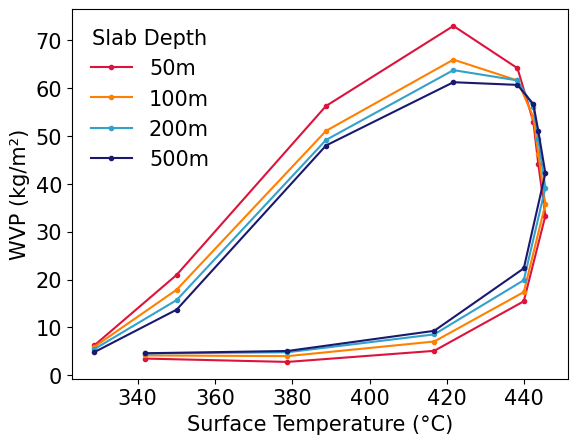

In [60]:


# Hysteresis tsurf
plt.figure()
plt.plot(sw_m_z_mean[slab_list_sel[0]], wvp_m_z_mean[slab_list_sel[0]], marker = '.', label = str(slab_list_sel[0]) + "m", color = "#DC143C")
plt.plot(sw_m_z_mean[slab_list_sel[1]], wvp_m_z_mean[slab_list_sel[1]], marker = '.', label = str(slab_list_sel[1]) + "m", color = "#FF8000")
plt.plot(sw_m_z_mean[slab_list_sel[2]], wvp_m_z_mean[slab_list_sel[2]], marker = '.', label = str(slab_list_sel[2]) + "m", color = "#33A1C9")
plt.plot(sw_m_z_mean[slab_list_sel[3]], wvp_m_z_mean[slab_list_sel[3]], marker = '.', label = str(slab_list_sel[3]) + "m", color = "#191970")
plt.xlabel('Surface Temperature (°C)')
plt.ylabel('WVP (kg/m²)')
plt.legend(frameon = False, title = "Slab Depth")
plt.savefig(savedir + '/general_characteristics/hysteresis_sw_wvp_slabmix.pdf',bbox_inches = 'tight')


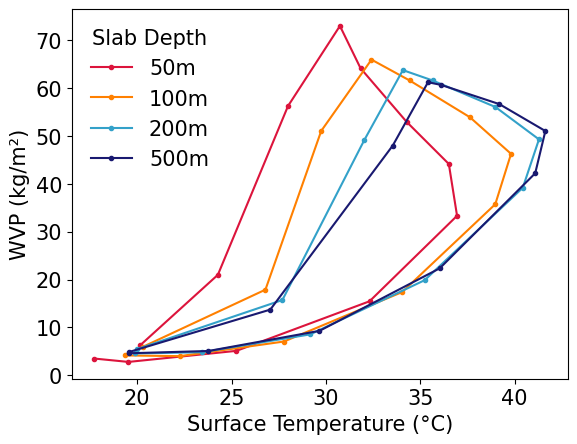

In [61]:


# Hysteresis tsurf
plt.figure()
plt.plot(tsurf_m_z_mean[slab_list_sel[0]], wvp_m_z_mean[slab_list_sel[0]], marker = '.', label = str(slab_list_sel[0]) + "m", color = "#DC143C")
plt.plot(tsurf_m_z_mean[slab_list_sel[1]], wvp_m_z_mean[slab_list_sel[1]], marker = '.', label = str(slab_list_sel[1]) + "m", color = "#FF8000")
plt.plot(tsurf_m_z_mean[slab_list_sel[2]], wvp_m_z_mean[slab_list_sel[2]], marker = '.', label = str(slab_list_sel[2]) + "m", color = "#33A1C9")
plt.plot(tsurf_m_z_mean[slab_list_sel[3]], wvp_m_z_mean[slab_list_sel[3]], marker = '.', label = str(slab_list_sel[3]) + "m", color = "#191970")
plt.xlabel('Surface Temperature (°C)')
plt.ylabel('WVP (kg/m²)')
plt.legend(frameon = False, title = "Slab Depth")
plt.savefig(savedir + '/general_characteristics/hysteresis_tsurf_wvp_slabmix.pdf',bbox_inches = 'tight')


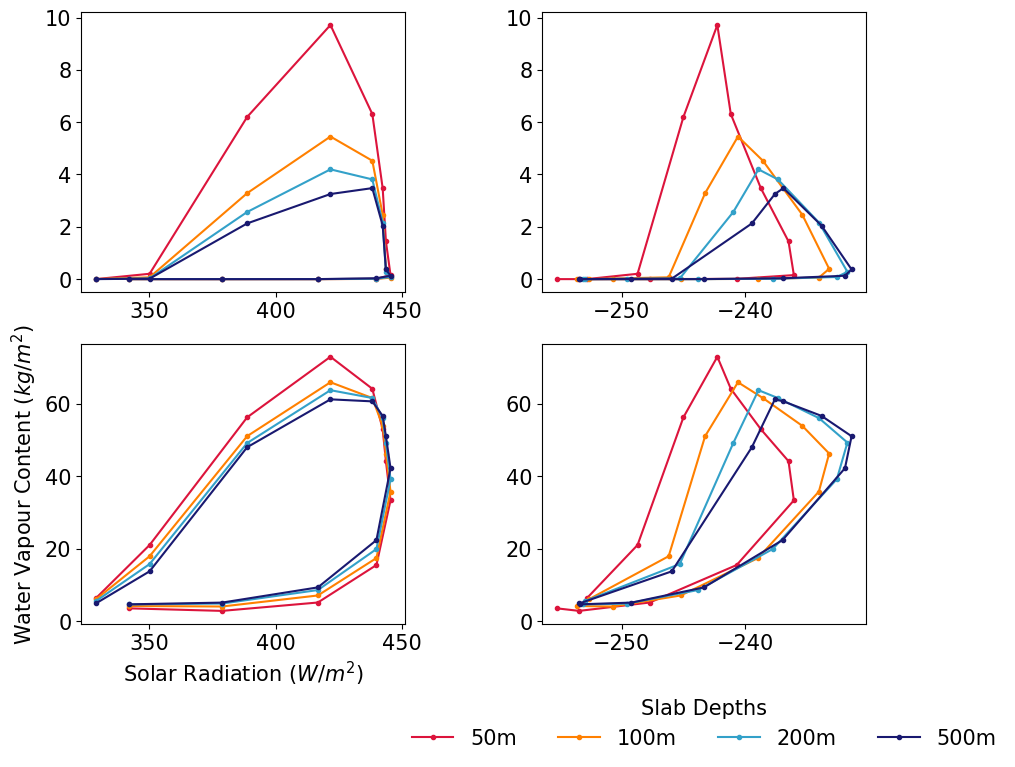

In [62]:


#%%

# Create a 2x2 panel
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1
axs[1, 0].plot(sw_m_z_mean[slab_list_sel[0]], wvp_m_z_mean[slab_list_sel[0]], marker='.', label=str(slab_list_sel[0]) + "m", color="#DC143C")
axs[1, 0].plot(sw_m_z_mean[slab_list_sel[1]], wvp_m_z_mean[slab_list_sel[1]], marker='.', label=str(slab_list_sel[1]) + "m", color="#FF8000")
axs[1, 0].plot(sw_m_z_mean[slab_list_sel[2]], wvp_m_z_mean[slab_list_sel[2]], marker='.', label=str(slab_list_sel[2]) + "m", color="#33A1C9")
axs[1, 0].plot(sw_m_z_mean[slab_list_sel[3]], wvp_m_z_mean[slab_list_sel[3]], marker='.', label=str(slab_list_sel[3]) + "m", color="#191970")
axs[1, 0].set_xlabel('Solar Radiation ($W/m^2$)')
axs[1, 0].set_ylabel('Water Vapour Content ($kg/m^2$)')


# Plot 2
axs[0, 0].plot(sw_m_z_mean[slab_list_sel[0]], pr_m_z_mean[slab_list_sel[0]], marker='.', label=str(slab_list_sel[0]) + "m", color="#DC143C")
axs[0, 0].plot(sw_m_z_mean[slab_list_sel[1]], pr_m_z_mean[slab_list_sel[1]], marker='.', label=str(slab_list_sel[1]) + "m", color="#FF8000")
axs[0, 0].plot(sw_m_z_mean[slab_list_sel[2]], pr_m_z_mean[slab_list_sel[2]], marker='.', label=str(slab_list_sel[2]) + "m", color="#33A1C9")
axs[0, 0].plot(sw_m_z_mean[slab_list_sel[3]], pr_m_z_mean[slab_list_sel[3]], marker='.', label=str(slab_list_sel[3]) + "m", color="#191970")

# Plot 3
axs[0, 1].plot(tsurf_m_z_mean[slab_list_sel[0]] - 273, pr_m_z_mean[slab_list_sel[0]], marker='.', label=str(slab_list_sel[0]) + "m", color="#DC143C")
axs[0, 1].plot(tsurf_m_z_mean[slab_list_sel[1]] - 273, pr_m_z_mean[slab_list_sel[1]], marker='.', label=str(slab_list_sel[1]) + "m", color="#FF8000")
axs[0, 1].plot(tsurf_m_z_mean[slab_list_sel[2]] - 273, pr_m_z_mean[slab_list_sel[2]], marker='.', label=str(slab_list_sel[2]) + "m", color="#33A1C9")
axs[0, 1].plot(tsurf_m_z_mean[slab_list_sel[3]] - 273, pr_m_z_mean[slab_list_sel[3]], marker='.', label=str(slab_list_sel[3]) + "m", color="#191970")

# Plot 4
axs[1, 1].plot(tsurf_m_z_mean[slab_list_sel[0]] - 273, wvp_m_z_mean[slab_list_sel[0]], marker='.', label=str(slab_list_sel[0]) + "m", color="#DC143C")
axs[1, 1].plot(tsurf_m_z_mean[slab_list_sel[1]] - 273, wvp_m_z_mean[slab_list_sel[1]], marker='.', label=str(slab_list_sel[1]) + "m", color="#FF8000")
axs[1, 1].plot(tsurf_m_z_mean[slab_list_sel[2]] - 273, wvp_m_z_mean[slab_list_sel[2]], marker='.', label=str(slab_list_sel[2]) + "m", color="#33A1C9")
axs[1, 1].plot(tsurf_m_z_mean[slab_list_sel[3]] - 273, wvp_m_z_mean[slab_list_sel[3]], marker='.', label=str(slab_list_sel[3]) + "m", color="#191970")


# Adjust layout to prevent clipping of titles
plt.tight_layout()
fig.subplots_adjust(bottom=0.1)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4, title = "Slab Depths",frameon = False)
plt.tight_layout()

plt.savefig(savedir + '/general_characteristics/hysteresis_4panel_slabmix.pdf', bbox_inches='tight')






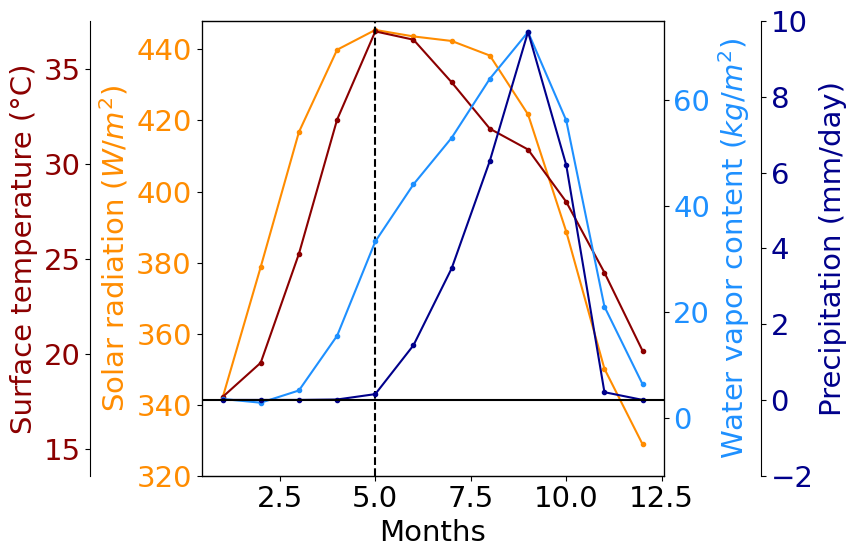

In [75]:
plt.rcParams.update({'font.size': 21})


fig, ax1 = plt.subplots(figsize=(9, 6)) 

# SW plot
ax1.plot(range(1,13), sw_m_z_mean[50], marker='.', color='darkorange')
ax1.set_ylabel('Solar radiation ($W/m^2$)', color='darkorange')
ax1.tick_params(axis='y', labelcolor='darkorange')
ax1.set_xlabel('Months')
ax1.set_ylim([320, 448])

# TSURF plot
ax2 = ax1.twinx()
ax2.spines['left'].set_position(('outward', 80))
ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')
ax2.plot(range(1,13), tsurf_m_z_mean[50], marker='.', color='darkred')
ax2.axvline(5, color='black', linestyle='--')
ax2.set_ylabel('Surface temperature (°C)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim([13.6, 37.5])

# WVP plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 0))
ax3.plot(range(1,13), wvp_m_z_mean[50], marker='.', color='dodgerblue')
ax3.set_ylabel('Water vapor content ($kg/m^2$)', color='dodgerblue')
ax3.set_ylim([-11, 75])
ax3.tick_params(axis='y', labelcolor='dodgerblue')

# PRECIP plot
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 70))
ax4.plot(range(1,13), pr_m_z_mean[50], marker='.', color='darkblue')
ax4.set_ylabel('Precipitation (mm/day)', color='darkblue')
ax4.set_ylim([-2, 10])
ax4.tick_params(axis='y', labelcolor='darkblue')
ax4.axhline(0, color = "black")

#ax2.text(-0.7, 1.135, 'C.', transform=axs[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')


fig.tight_layout()
plt.xlabel('Months')
#plt.title('Slab 50m')
plt.savefig(savedir + '/year_slab50_'+ str(l_m) + '_' + str(u_m) + '.pdf', bbox_inches='tight')

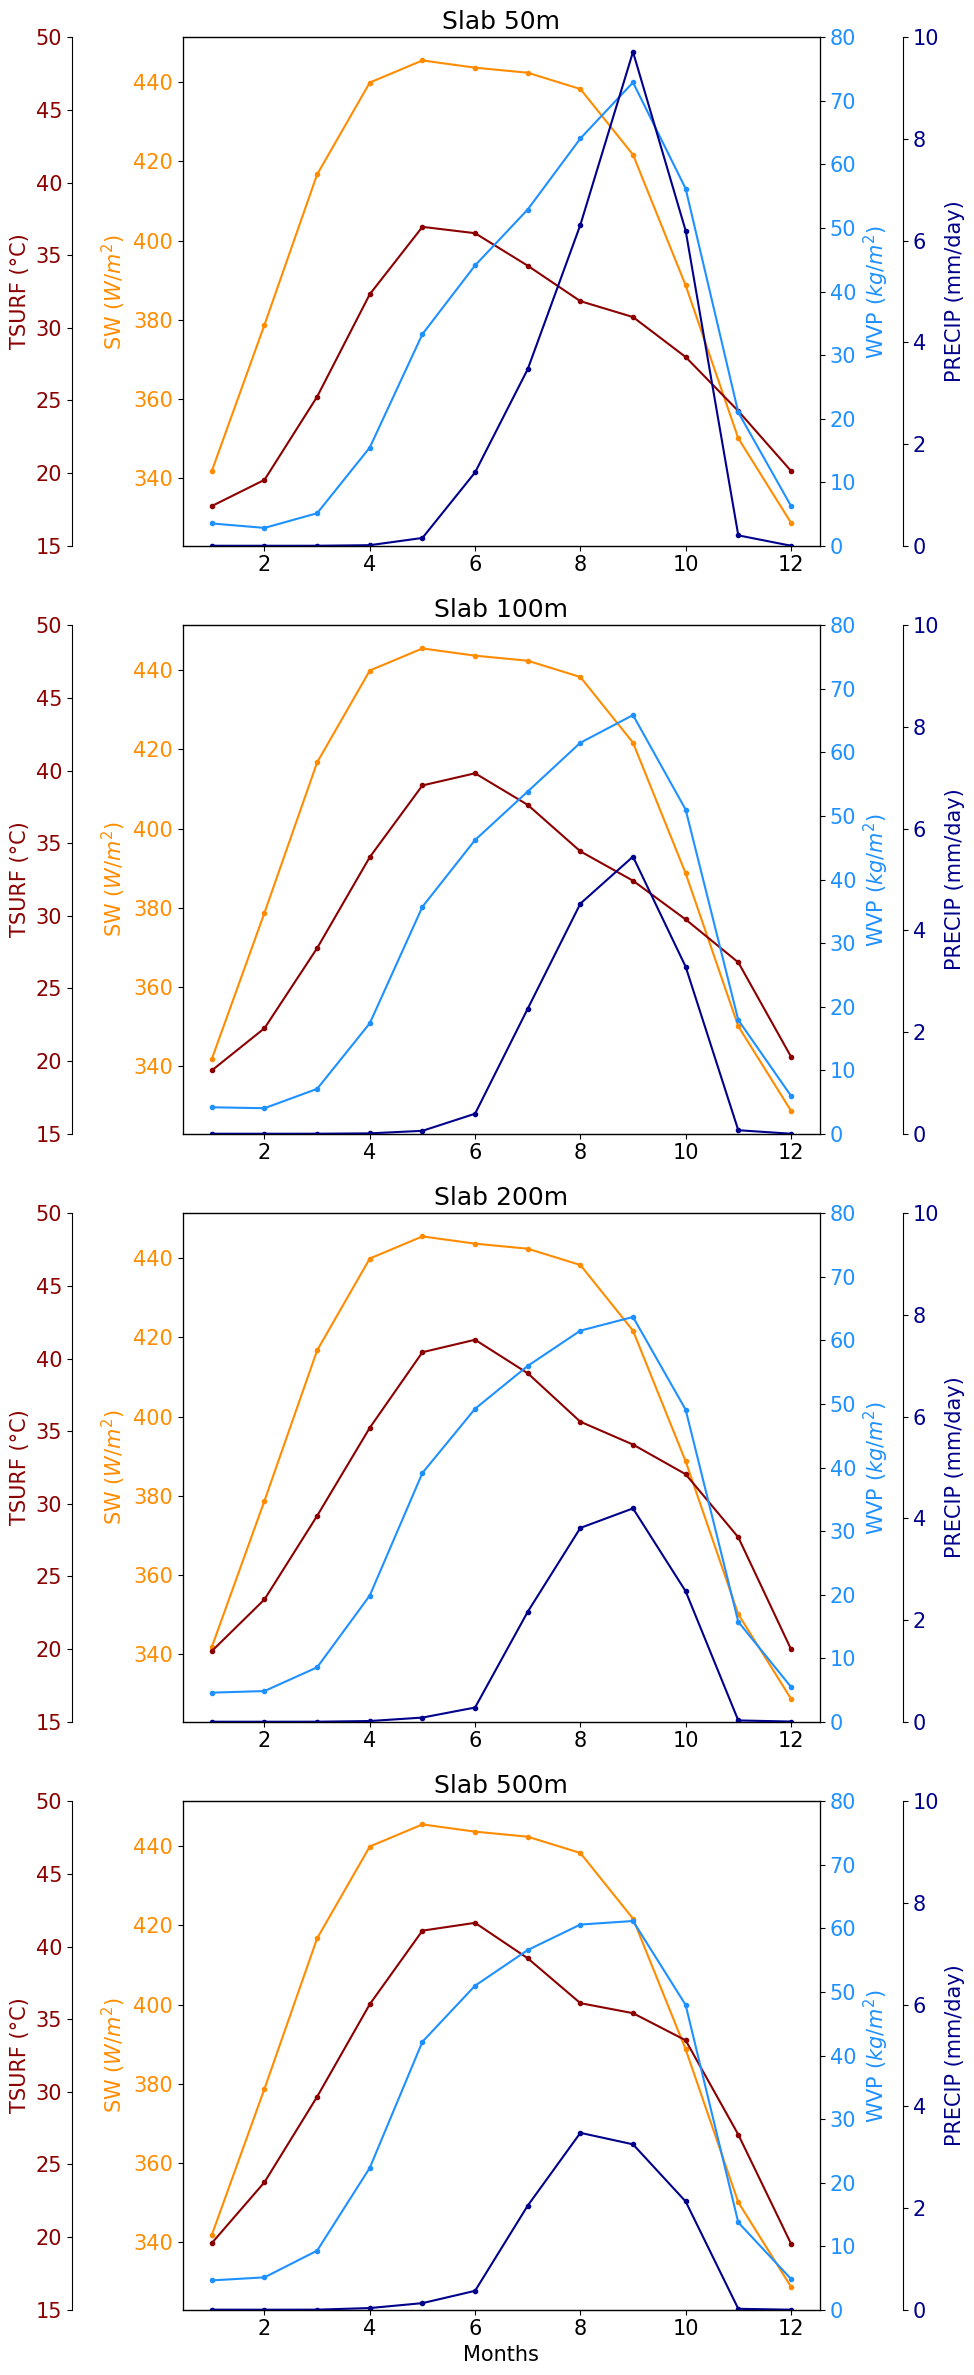

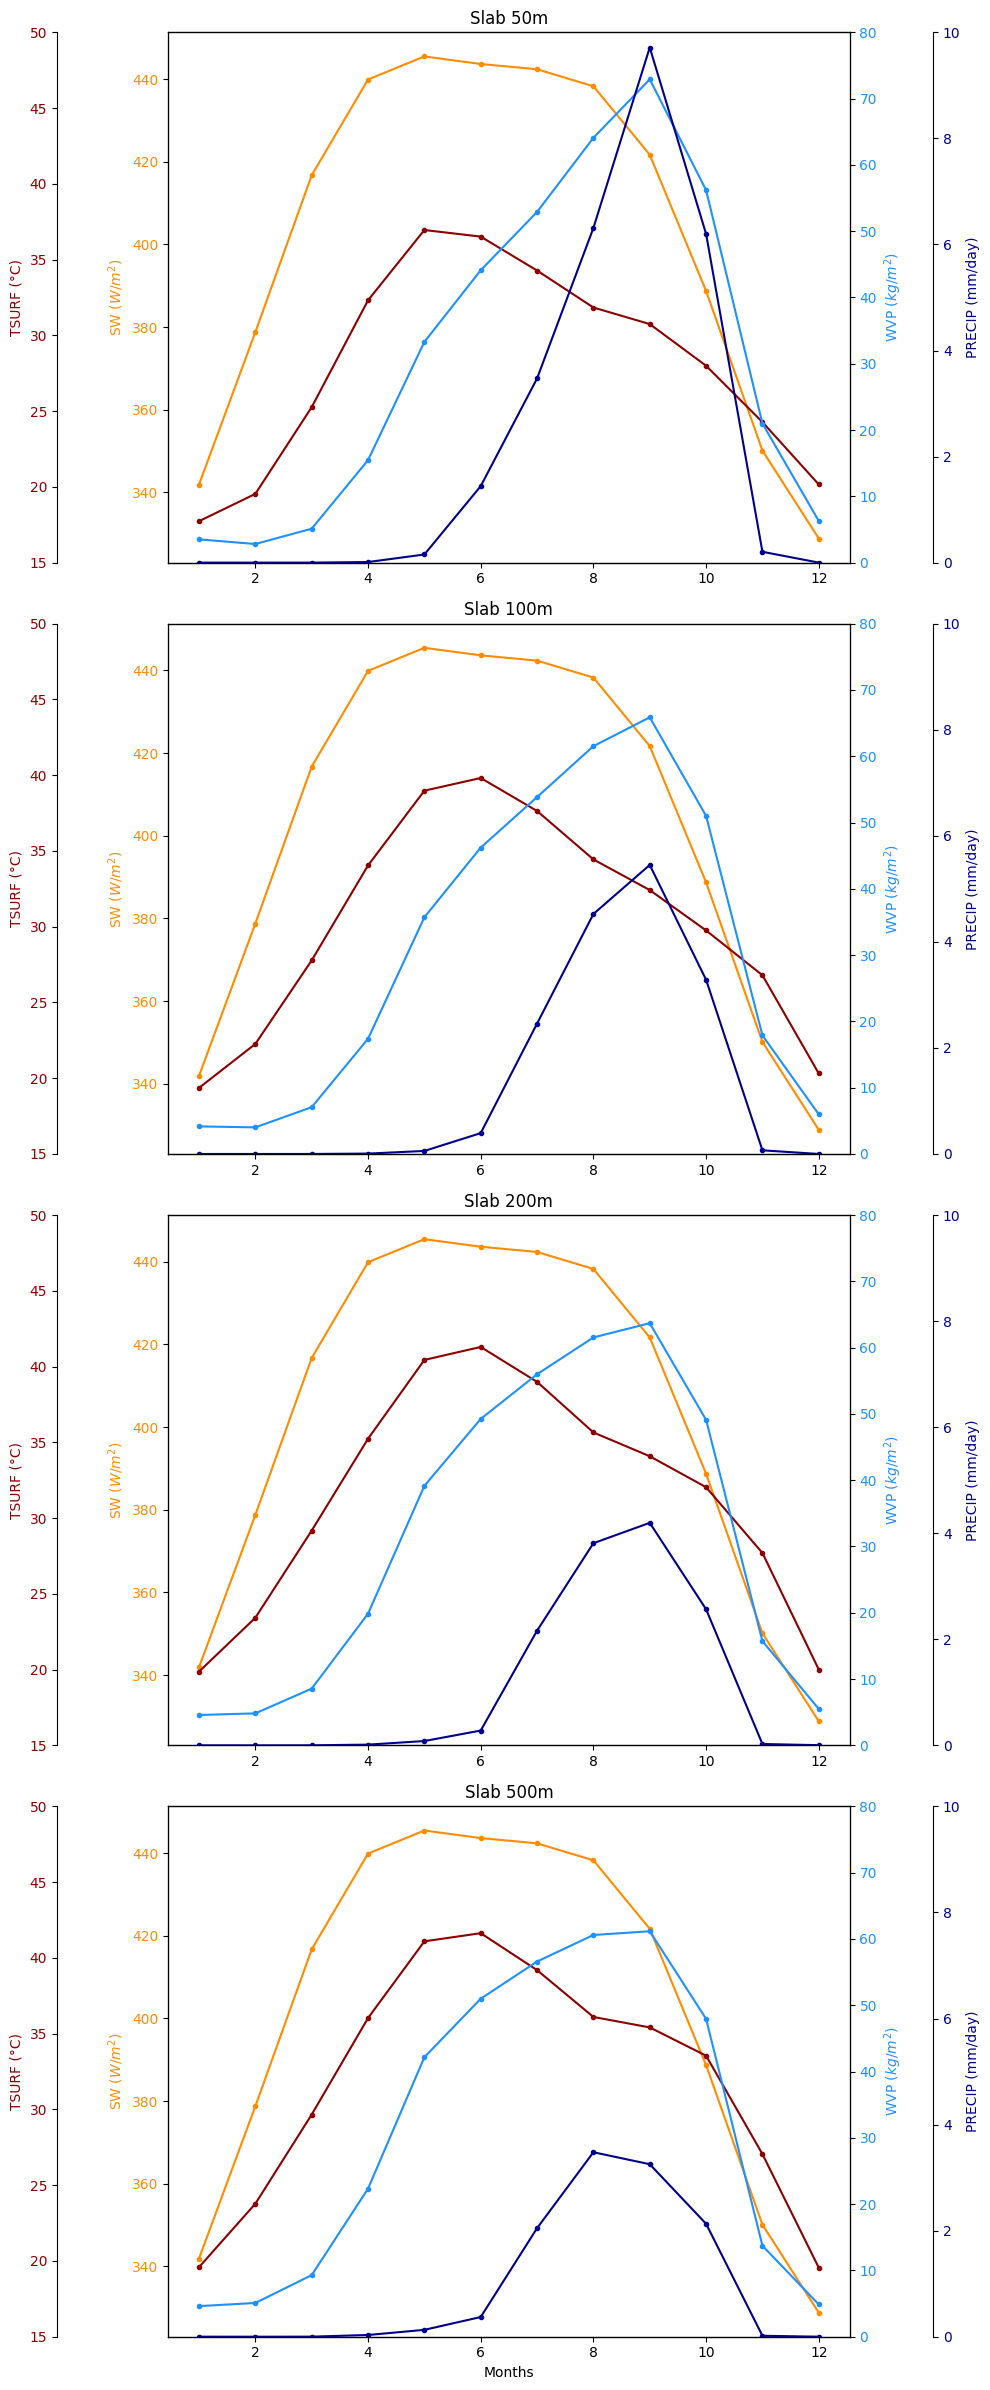

In [33]:
fig, axs = plt.subplots(4, 1, figsize=(10, 24))  # Create 4 subplots

depths = [50, 100, 200, 500]  # Depths for each subplot
tsurf_ylim = [15, 50]  # Set the same y-axis limit for all TSURF plots

for i, ax1 in enumerate(axs):
    depth = depths[i]

    # SW plot
    ax1.plot(range(1,13), sw_m_z_mean[depth], marker='.', color='darkorange')
    ax1.set_ylabel('SW ($W/m^2$)', color='darkorange')
    ax1.tick_params(axis='y', labelcolor='darkorange')

    # TSURF plot
    ax2 = ax1.twinx()
    ax2.spines['left'].set_position(('outward', 80))
    ax2.yaxis.set_ticks_position('left')
    ax2.yaxis.set_label_position('left')
    ax2.plot(range(1,13), tsurf_m_z_mean[depth], marker='.', color='darkred')
    ax2.set_ylabel('TSURF (°C)', color='darkred')
    ax2.set_ylim(tsurf_ylim)  # Set y-axis limit for TSURF plot
    ax2.tick_params(axis='y', labelcolor='darkred')

    # WVP plot
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 0))
    ax3.plot(range(1,13), wvp_m_z_mean[depth], marker='.', color='dodgerblue')
    ax3.set_ylabel('WVP ($kg/m^2$)', color='dodgerblue')
    ax3.set_ylim([0, 80])
    ax3.tick_params(axis='y', labelcolor='dodgerblue')

    # PRECIP plot
    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('outward', 60))
    ax4.plot(range(1,13), pr_m_z_mean[depth], marker='.', color='darkblue')
    ax4.set_ylabel('PRECIP (mm/day)', color='darkblue')
    ax4.set_ylim([0, 10])
    ax4.tick_params(axis='y', labelcolor='darkblue')

    ax1.set_title('Slab ' + str(depth) + 'm')  # Set title for each subplot

    if i == 3:  # Only set x-label for the bottom subplot
        ax1.set_xlabel('Months')

plt.subplots_adjust(hspace=0.5)  # Adjust the space between subplots
fig.tight_layout()
plt.savefig(savedir + '/hysteresis_tsurf/year_slab_multiple_depths_' + str(l_m) + '_' + str(u_m) + '.pdf', bbox_inches='tight')



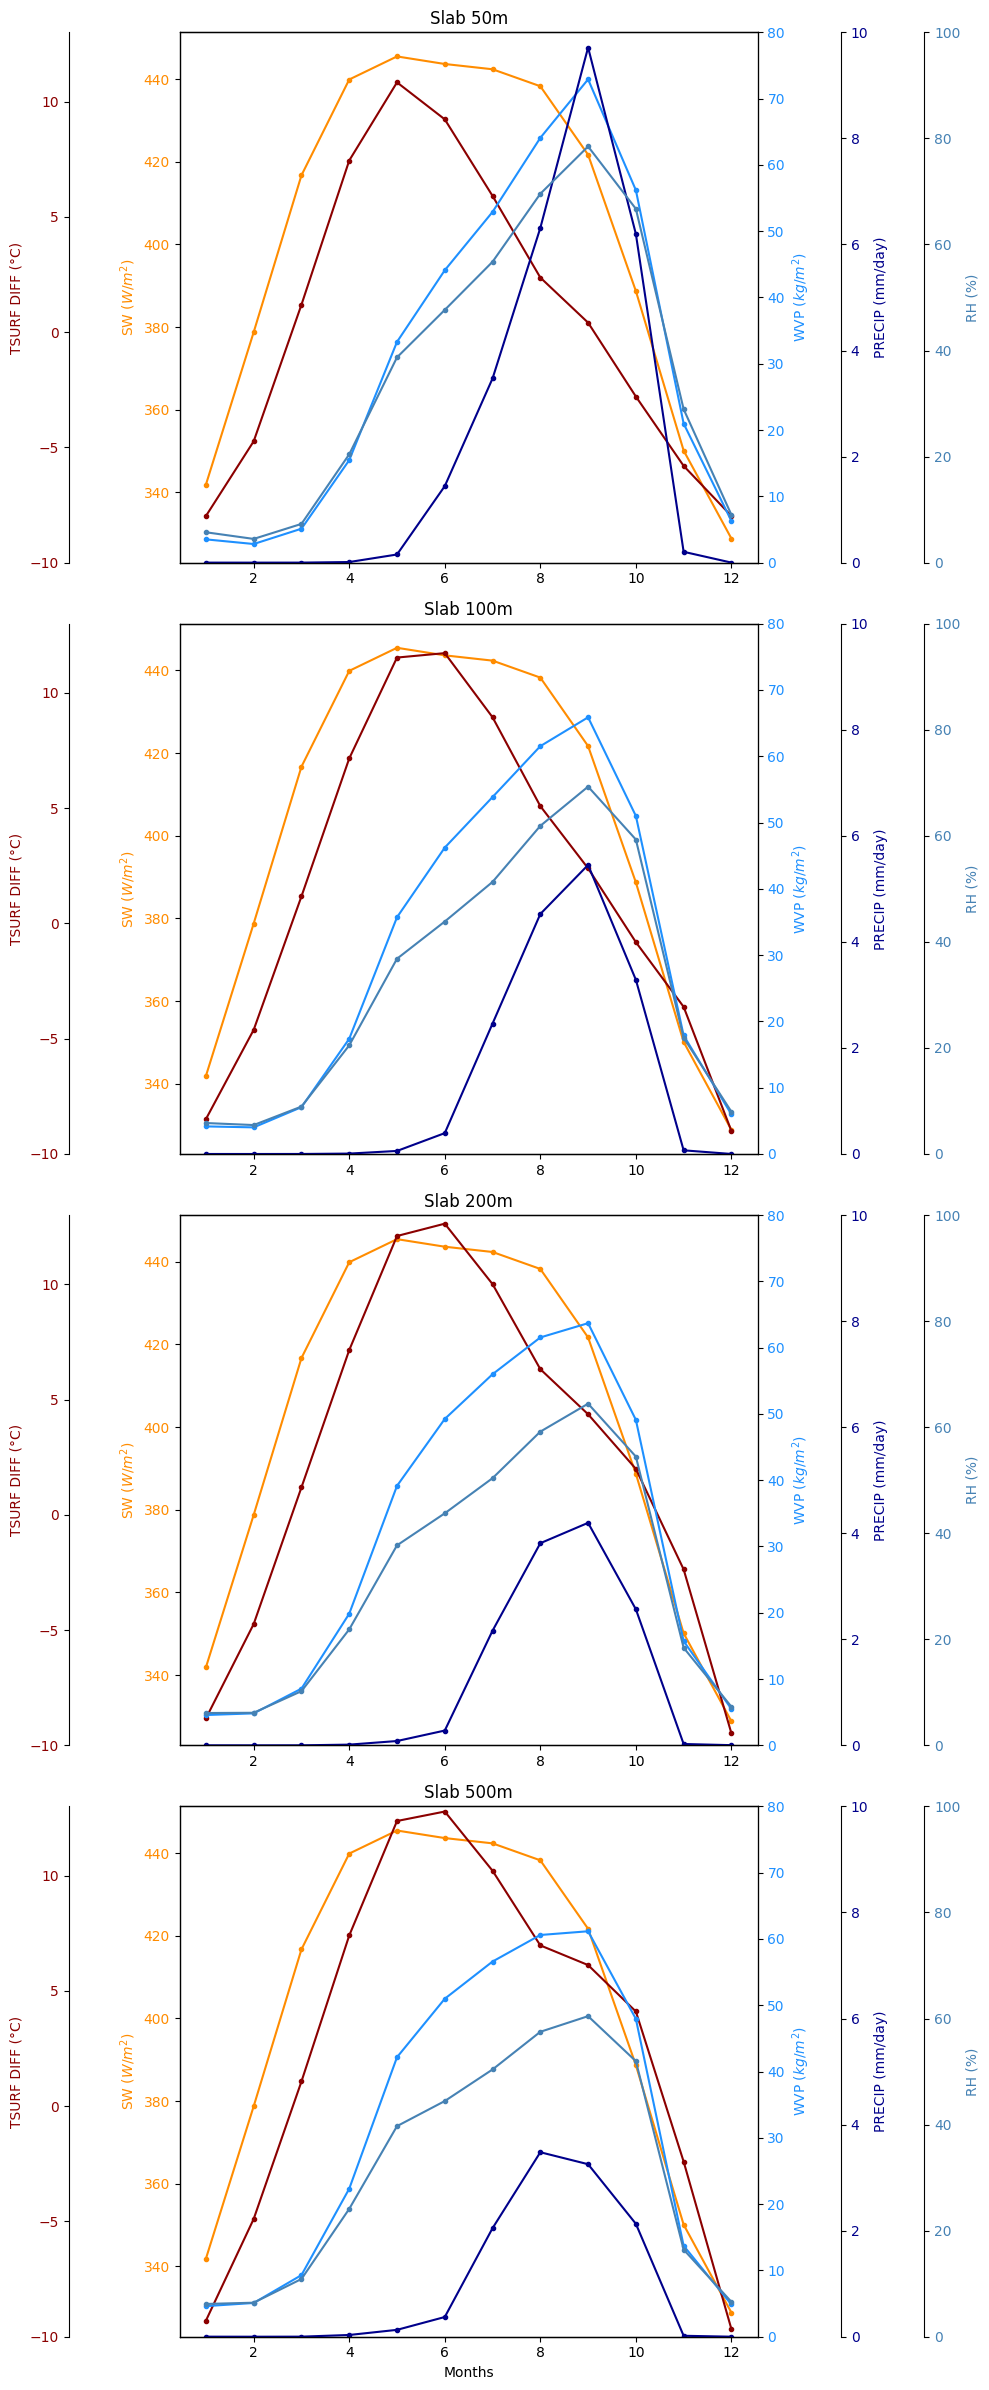

In [34]:
fig, axs = plt.subplots(4, 1, figsize=(10, 24))  # Create 4 subplots

depths = [50, 100, 200, 500]  # Depths for each subplot
tsurf_ylim = [-10, 13]  # Set the same y-axis limit for all TSURF plots

for i, ax1 in enumerate(axs):
    depth = depths[i]

    # SW plot
    ax1.plot(range(1,13), sw_m_z_mean[depth], marker='.', color='darkorange')
    ax1.set_ylabel('SW ($W/m^2$)', color='darkorange')
    ax1.tick_params(axis='y', labelcolor='darkorange')

    # TSURF DIFF plot
    ax2 = ax1.twinx()
    ax2.spines['left'].set_position(('outward', 80))
    ax2.yaxis.set_ticks_position('left')
    ax2.yaxis.set_label_position('left')
    ax2.plot(range(1,13), tsurf_m_z_mean[depth] - tsurf_neo_z_mean[depth], marker='.', color='darkred')
    ax2.set_ylabel('TSURF DIFF (°C)', color='darkred')
    ax2.set_ylim(tsurf_ylim)  # Set y-axis limit for TSURF plot
    ax2.tick_params(axis='y', labelcolor='darkred')

    # WVP plot
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 0))
    ax3.plot(range(1,13), wvp_m_z_mean[depth], marker='.', color='dodgerblue')
    ax3.set_ylabel('WVP ($kg/m^2$)', color='dodgerblue')
    ax3.set_ylim([0, 80])
    ax3.tick_params(axis='y', labelcolor='dodgerblue')

    # PRECIP plot
    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('outward', 60))
    ax4.plot(range(1,13), pr_m_z_mean[depth], marker='.', color='darkblue')
    ax4.set_ylabel('PRECIP (mm/day)', color='darkblue')
    ax4.set_ylim([0, 10])
    ax4.tick_params(axis='y', labelcolor='darkblue')

    # RH plot
    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('outward', 120))
    ax4.plot(range(1,13), rh_m_z_mean_h[depth], marker='.', color='steelblue')
    ax4.set_ylabel('RH (%)', color='steelblue')
    ax4.set_ylim([0, 100])
    ax4.tick_params(axis='y', labelcolor='steelblue')


    ax1.set_title('Slab ' + str(depth) + 'm')  # Set title for each subplot

    if i == 3:  # Only set x-label for the bottom subplot
        ax1.set_xlabel('Months')

plt.subplots_adjust(hspace=0.5)  # Adjust the space between subplots
fig.tight_layout()

plt.savefig(savedir + '/hysteresis_tsurf/year_slab_multiple_depths_' + str(l_m) + '_' + str(u_m) + '.pdf', bbox_inches='tight')
